# Decision tree

### Introduction



In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt 


<h3>Import data</h3>
<p>First, we import the data from the heart dataset that we got and we use fuction called "read_csv()" form pandas library to load the data and we give each arrtibute a name then we show the five row in the data </p>

In [12]:
df = pd.read_csv('heart.csv',header=None)

df.columns = ['age','sex','cp','testbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','Target']
df.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h3>Missing data</h3>

<p>After that we look for any missing data that could be in the dataset in this case we go throuth every column and it each value that is in the column then if there any missing data it will print how many missing value beside the colunm name that have missing data</p>

In [13]:
df.isnull().sum()


age        0
sex        0
cp         0
testbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
Target     0
dtype: int64

<h3>Split the data</h3>
<p>Now we must split the examples from the target in oarder to train and test the model </p>

In [14]:
X = df.drop('Target' ,axis =1).copy()
X.head()



,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
y= df['Target'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

<h3>dealing with categorical data</h3>
<p>after we split the data we face a problem that in some column, for instance, chest pain column its categorical means it has four types not only two so we have to encode it and we use "One-hot encode" that will convert to binary value zero and one but it will create another column, by using "get_dummies" function we could able to do it for chest pain column and the rest thet have to be encoded. </p>

In [16]:
X_encoded = pd.get_dummies(X, columns = ['cp','thal','ca','slope','restecg'])
X_encoded.head()

,age,sex,testbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,0,0,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,0,0,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,0,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,0,0,0,0,0,1,0,1,0


<h3>Classifier</h3>
<p>First, we spilt the data into 70% to train the model and 30% to test the model, then we caluate the accuracy and we got for train data accurcy 1.0 which 100% and for test data 0.72 ~ 72%, you can see that the data having overfiting since the train accurcy grater than test accurcy, then we show the tree that have size 81 which is huge.</p>

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

#tree_clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
#tree_clf = DecisionTreeClassifier(criterion="gini",random_state=0)
tree_clf = DecisionTreeClassifier(random_state=0)

tree_clf = tree_clf.fit(X_train,y_train)

y_predict_test = tree_clf.predict(X_test)
y_predict_train = tree_clf.predict(X_train)

print("Accuracy for test data:",metrics.accuracy_score(y_predict_test,y_test))
print("Accuracy for train data:",metrics.accuracy_score(y_predict_train,y_train))

print("Tree size:",tree_clf.tree_.node_count)

Accuracy for test data: 0.7142857142857143
Accuracy for train data: 1.0
Tree size: 81


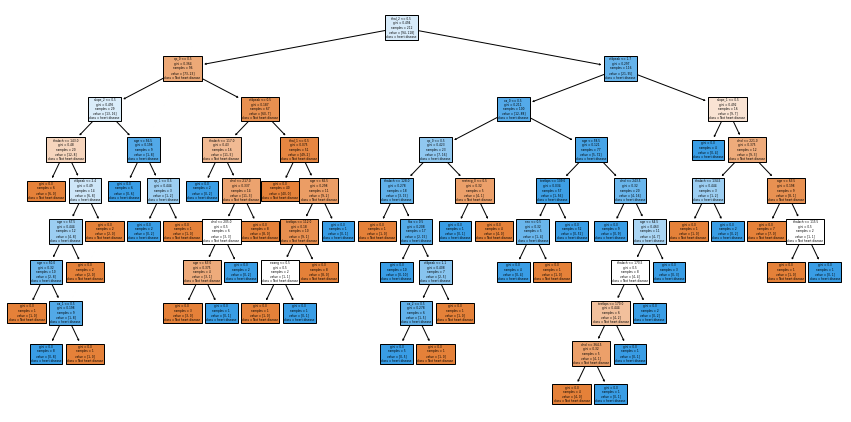

In [18]:
plt.figure(figsize=[15,7.5])
plot_tree(tree_clf,filled= True,class_names=['Not heart disease','heart disease'], feature_names= X_encoded.columns)
plt.show()

<p>Here the confusion matrix for train, test data that will help us to find out in how many the model failed to classfiy corrctly, and we can caluate precision and recall for tain data as well as test data. Precision = TP/TP+FP = 94/(94+0) = 1, recall = TP/TP+FN = 94/94+0 = 1, so we got for train data 100% precision and recll, using the same formul we can find it for test data, and we got 68% precision , 71% recall. </p>

confusion Matrix (Train)


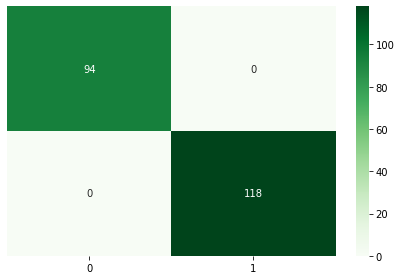

confusion Matrix (Test)


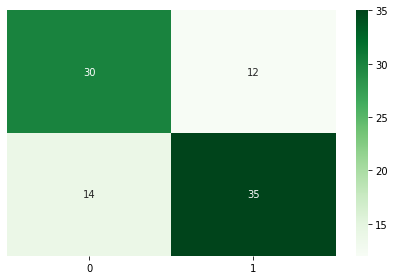

In [21]:
cf_train = metrics.confusion_matrix(y_predict_train,y_train)
cf_test = metrics.confusion_matrix(y_predict_test,y_test)
sn.heatmap(cf_train,annot=True,yticklabels=0,xticklabels=1,cmap='Greens', fmt='g')

print("confusion Matrix (Train)")

plt.tight_layout()
plt.show()
print("confusion Matrix (Test)")
sn.heatmap(cf_test,annot=True,yticklabels=0,xticklabels=1,cmap='Greens', fmt='g')

plt.tight_layout()
plt.show()

In [30]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

print(ccp_alphas)

[0.         0.00419287 0.00419287 0.00424528 0.00463423 0.00481872
 0.00554939 0.0058064  0.00628931 0.00655136 0.00693674 0.00707547
 0.00754717 0.00754717 0.00808625 0.00862534 0.00938653 0.01219186
 0.01293801 0.01399552 0.01591981 0.02547902 0.03819352]


In [31]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

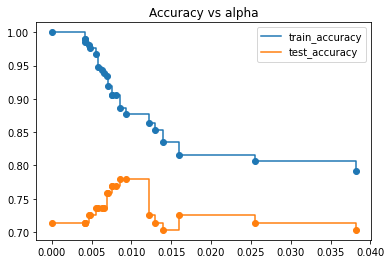

In [32]:
train_acc = []
test_acc = []
tree_size_train=[]
tree_size_test=[]

for c in clfs:
    y_predect_train = c.predict(X_train)
    y_predect_test = c.predict(X_test)
    train_acc.append(metrics.accuracy_score(y_predect_train, y_train))
    test_acc.append(metrics.accuracy_score(y_predect_test, y_test))
    
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()

plt.title('Accuracy vs alpha')
plt.show()


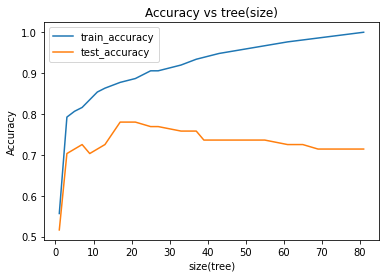

In [25]:
train_acc = []
test_acc = []
tree_size_train=[]
tree_size_test=[]

for c in clfs:
    y_predect_train = c.predict(X_train)
    y_predect_test = c.predict(X_test)
    tree_size_train.append(c.tree_.node_count)
    train_acc.append(metrics.accuracy_score(y_predect_train, y_train))
    test_acc.append(metrics.accuracy_score(y_predect_test, y_test))
    

plt.plot(tree_size_train,train_acc,label='train_accuracy')
plt.plot(tree_size_train,test_acc,label='test_accuracy')
plt.legend()
plt.xlabel("size(tree)")
plt.ylabel("Accuracy")
plt.title('Accuracy vs tree(size)')
plt.show()

In [29]:
tree_clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.01)
tree_clf = tree_clf.fit(X_train,y_train)

y_predict_test1 = tree_clf.predict(X_test)
y_predict_train1 = tree_clf.predict(X_train)

print("Accuracy for test data:",metrics.accuracy_score(y_predict_test1,y_test))
print("Accuracy for train data:",metrics.accuracy_score(y_predict_train1,y_train))


Accuracy for test data: 0.7802197802197802
Accuracy for train data: 0.8773584905660378


In [27]:
cf_train = metrics.confusion_matrix(y_predict_train1,y_train)
cf_test = metrics.confusion_matrix(y_predict_test1,y_test)
sn.heatmap(cf_train,annot=True,yticklabels=classes,xticklabels=classes,cmap='Greens', fmt='g')

print("confusion Matrix (Train)")

plt.tight_layout()
plt.show()
print("confusion Matrix (Test)")
sn.heatmap(cf_test,annot=True,yticklabels=classes,xticklabels=classes,cmap='Greens', fmt='g')

plt.tight_layout()
plt.show()


NameError: name 'classes' is not defined

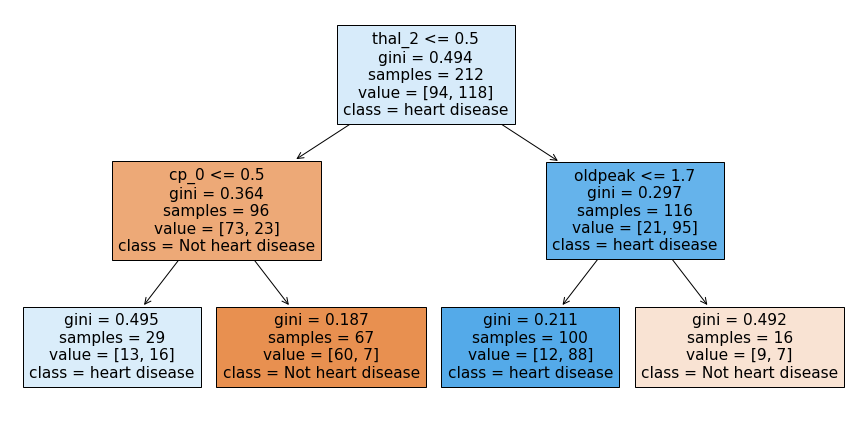

In [28]:
plt.figure(figsize=[15,7.5])

plot_tree(tree_clf,filled= True,class_names=['Not heart disease','heart disease'], feature_names= X_encoded.columns);